In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
csv_file = 'data/20240118/2024-01-18+18:05:24+optitrackstate.csv'
df = pd.read_csv(csv_file)

# 将第一列设置为时间索引

print(df.columns)
# 绘制图表
plt.plot(df[' pitch'])
plt.plot(df[' roll'])
plt.plot(df[' yaw'])
plt.xlabel('Time')
plt.ylabel('Angle')
plt.title('Attitude')
plt.show()

Index(['timeTick', ' stateX', ' stateY', ' stateZ', ' stateVX', ' stateVY',
       ' stateVZ', ' whisker1', ' whisker2', ' whisker3', ' laserFront'],
      dtype='object')


KeyError: ' pitch'

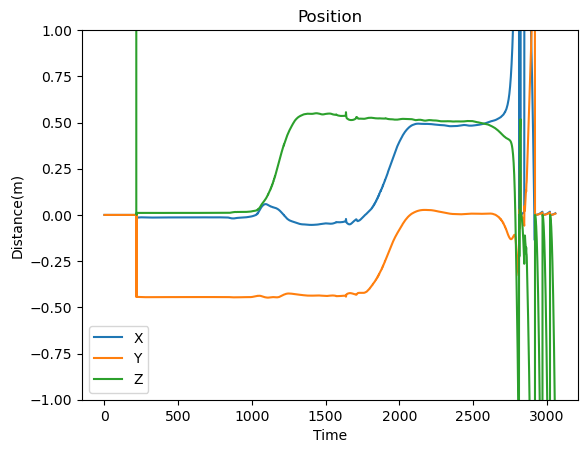

In [6]:
plt.plot(df[' stateX'],label='X')
plt.plot(df[' stateY'],label='Y')
plt.plot(df[' stateZ'],label='Z')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Distance(m)')
plt.ylim(-1,1)
plt.title('Position')
plt.show()

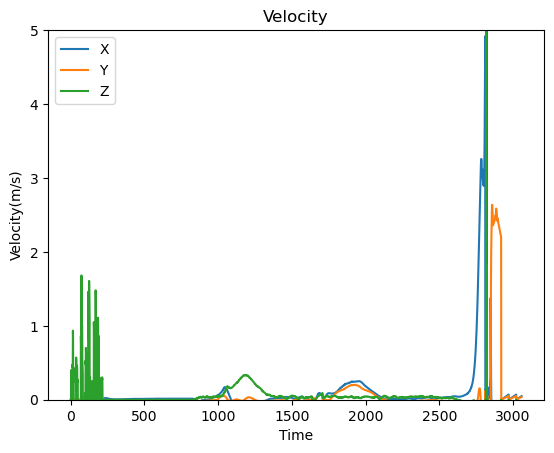

In [9]:
plt.plot(df[' stateVX'],label='X')
plt.plot(df[' stateVY'],label='Y')
plt.plot(df[' stateVZ'],label='Z')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Velocity(m/s)')
plt.ylim(0,5)
plt.title('Velocity')
plt.show()

In [10]:
plt.plot(df[' motor1'],label='motor1')
plt.plot(df[' motor2'],label='motor2')
plt.plot(df[' motor3'],label='motor3')
plt.plot(df[' motor4'],label='motor4')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Velocity(m/s)')
plt.title('Motor')
plt.show()

KeyError: ' motor1'

Index(['timeTick', ' stateX', ' stateY', ' stateZ', ' stateVX', ' stateVY',
       ' stateVZ', ' whisker1', ' whisker2', ' whisker3', ' laserFront'],
      dtype='object')


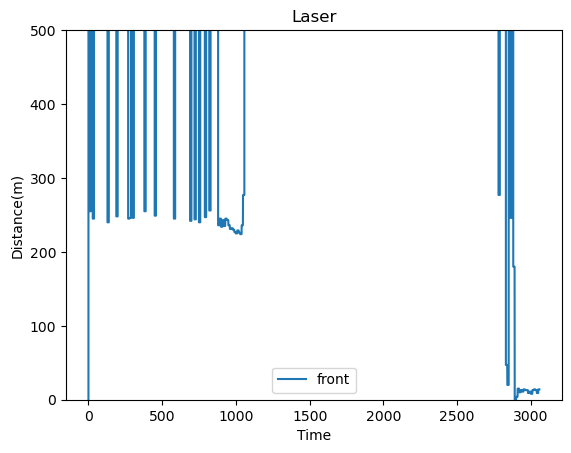

In [14]:
csv_file = 'data/20240118/2024-01-18+18:05:24+optitrackstate.csv'
df = pd.read_csv(csv_file)

# 将第一列设置为时间索引

print(df.columns)
# 绘制图表
plt.plot(df[' laserFront'],label='front')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Distance(m)')
plt.ylim(0, 500)
plt.title('Laser')
plt.show()

Index(['timeTick', ' stateX', ' stateY', ' stateZ', ' stateVX', ' stateVY',
       ' stateVZ', ' whisker1', ' whisker2', ' whisker3', ' laserFront'],
      dtype='object')


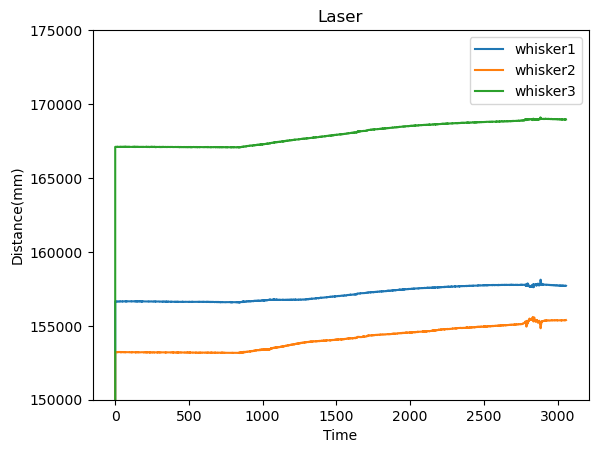

In [19]:
csv_file = 'data/20240118/2024-01-18+18:05:24+optitrackstate.csv'
df = pd.read_csv(csv_file)

# 将第一列设置为时间索引

print(df.columns)
# 绘制图表
plt.plot(df[' whisker1'],label='whisker1')
plt.plot(df[' whisker2'],label='whisker2')
plt.plot(df[' whisker3'],label='whisker3')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Distance(mm)')
plt.ylim(150000, 175000)
plt.title('Laser')
plt.show()

Camera
Optitrack raw or kalman output
Laser range
Wall